In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [9]:
train = pd.read_csv('train.csv')
train, test = train_test_split(train, test_size=0.2, random_state=2308)
y = train.Survived
train = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y_test = test.Survived
submit = pd.DataFrame()
submit['PassengerId'] = test['PassengerId']
test = test.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

In [10]:
test.Embarked = test.Embarked.astype('str')
le = LabelEncoder()
toEncodeT = test[['Sex','Embarked']]
encodedT = toEncodeT.apply(le.fit_transform)
test.Sex = encodedT.Sex
test.Embarked = encodedT.Embarked

In [11]:
train.Embarked = train.Embarked.astype('str')

In [12]:
le = LabelEncoder()
toEncode = train[['Sex','Embarked']]
encoded = toEncode.apply(le.fit_transform)

In [13]:
train.Sex = encoded.Sex
train.Embarked = encoded.Embarked

In [14]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
112,3,1,22.0,0,0,8.05,2
820,1,0,52.0,1,1,93.50,2
712,1,1,48.0,1,0,52.00,2
226,2,1,19.0,0,0,10.50,2
772,2,0,57.0,0,0,10.50,2


In [15]:
train.fillna(0, inplace=True)

In [16]:
test.fillna(0, inplace=True)

In [17]:
l =[]
for i in range(len(train)):
    l.append(0)

mse = metrics.mean_squared_error(y, l)
rmse = np.sqrt(mse)
print(rmse)

0.6100745948127615


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(random_state=0)
clf.fit(train, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
112,3,1,22.0,0,0,8.05,2
820,1,0,52.0,1,1,93.50,2
712,1,1,48.0,1,0,52.00,2
226,2,1,19.0,0,0,10.50,2
772,2,0,57.0,0,0,10.50,2


In [22]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
785,3,1,25.0,0,0,7.2500,2
136,1,0,19.0,0,2,26.2833,2
369,1,0,24.0,0,0,69.3000,0
505,1,1,18.0,1,0,108.9000,0
143,3,1,19.0,0,0,6.7500,1


In [23]:
predictions = clf.predict(test)
submit['prediction'] = predictions
submit['prediction'] = submit['prediction'].astype(int)
submit.to_csv('firstRF.csv', index=False, header=True)

In [24]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
112,3,1,22.0,0,0,8.05,2
820,1,0,52.0,1,1,93.50,2
712,1,1,48.0,1,0,52.00,2
226,2,1,19.0,0,0,10.50,2
772,2,0,57.0,0,0,10.50,2


In [25]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
785,3,1,25.0,0,0,7.2500,2
136,1,0,19.0,0,2,26.2833,2
369,1,0,24.0,0,0,69.3000,0
505,1,1,18.0,1,0,108.9000,0
143,3,1,19.0,0,0,6.7500,1


In [26]:
y_test.head()

785    0
136    1
369    1
505    0
143    0
Name: Survived, dtype: int64

In [27]:
clf.score(train, y)

0.9662921348314607

In [28]:
feature_importances = pd.DataFrame(data= { 'feature_importance_values':
                                          clf.feature_importances_}, index=train.columns.values)
feature_importances.sort_values('feature_importance_values')

,feature_importance_values
Embarked,0.040352
Parch,0.045229
SibSp,0.056355
Pclass,0.090631
Sex,0.229527
Age,0.240886
Fare,0.297020


In [29]:
scores = cross_val_score(clf, train, y)

In [30]:
scores.mean()

0.7809275608977768

In [31]:
corrMatrixDataNum = train.corr(method='kendall')

In [32]:
corrMatrixDataNum

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.139658,-0.306759,-0.035020,-0.008813,-0.576541,0.099112
Sex,0.139658,1.000000,-0.017825,-0.195989,-0.246084,-0.229649,0.111022
Age,-0.306759,-0.017825,1.000000,-0.043840,-0.036157,0.168680,0.101691
SibSp,-0.035020,-0.195989,-0.043840,1.000000,0.428446,0.358727,-0.002661
Parch,-0.008813,-0.246084,-0.036157,0.428446,1.000000,0.323298,0.021494
Fare,-0.576541,-0.229649,0.168680,0.358727,0.323298,1.000000,-0.075048
Embarked,0.099112,0.111022,0.101691,-0.002661,0.021494,-0.075048,1.000000


In [33]:
corrM = train
corrM['Survive'] = y
corrMatrixDataNumE = train.corr(method='kendall')
corrMatrixDataNumE

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survive
Pclass,1.000000,0.139658,-0.306759,-0.035020,-0.008813,-0.576541,0.099112,-0.326341
Sex,0.139658,1.000000,-0.017825,-0.195989,-0.246084,-0.229649,0.111022,-0.545499
Age,-0.306759,-0.017825,1.000000,-0.043840,-0.036157,0.168680,0.101691,0.045211
SibSp,-0.035020,-0.195989,-0.043840,1.000000,0.428446,0.358727,-0.002661,0.114208
Parch,-0.008813,-0.246084,-0.036157,0.428446,1.000000,0.323298,0.021494,0.160913
Fare,-0.576541,-0.229649,0.168680,0.358727,0.323298,1.000000,-0.075048,0.283911
Embarked,0.099112,0.111022,0.101691,-0.002661,0.021494,-0.075048,1.000000,-0.154707
Survive,-0.326341,-0.545499,0.045211,0.114208,0.160913,0.283911,-0.154707,1.000000


## Partial Plots

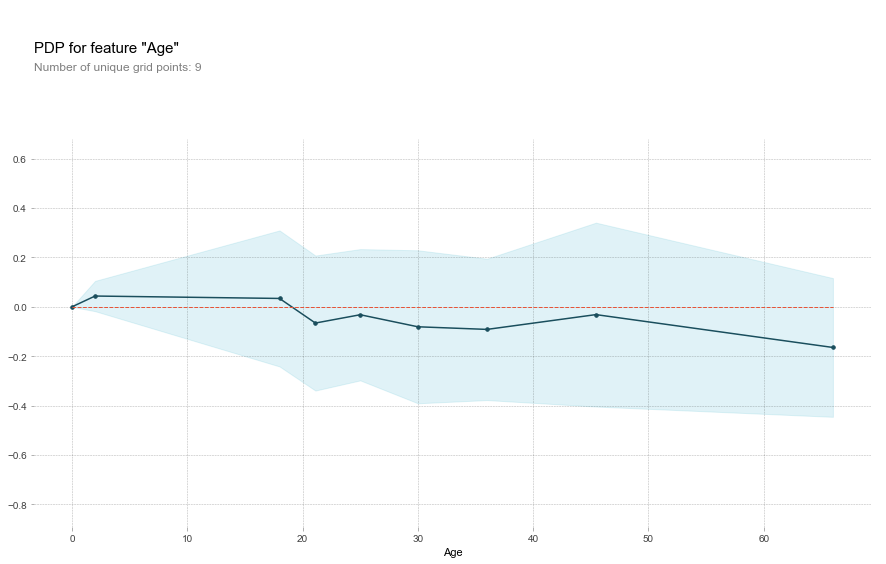

In [37]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=clf, dataset=test, model_features=test.columns, feature='Age')

# plot it
pdp.pdp_plot(pdp_goals, 'Age')
plt.show()

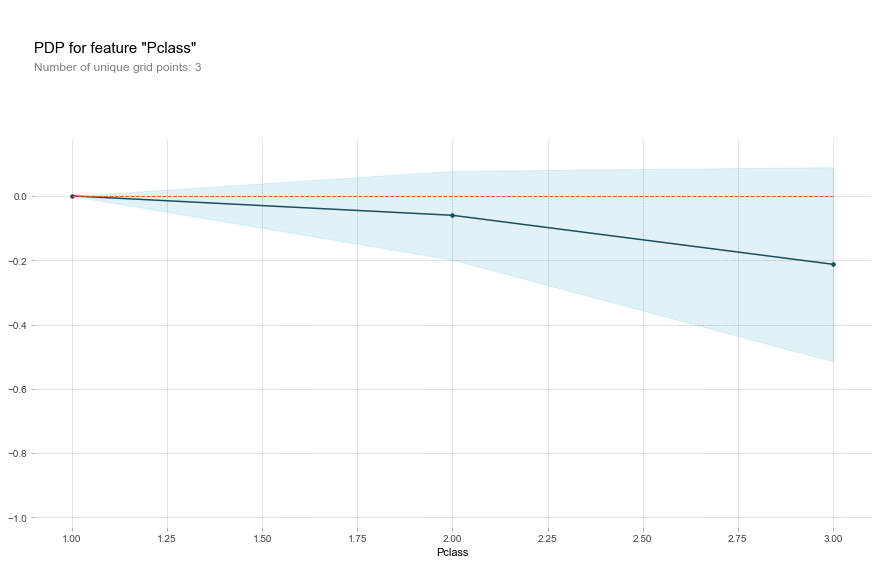

In [38]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=clf, dataset=test, model_features=test.columns, feature='Pclass')

# plot it
pdp.pdp_plot(pdp_goals, 'Pclass')
plt.show()

## 2D Partial Dependence Plots

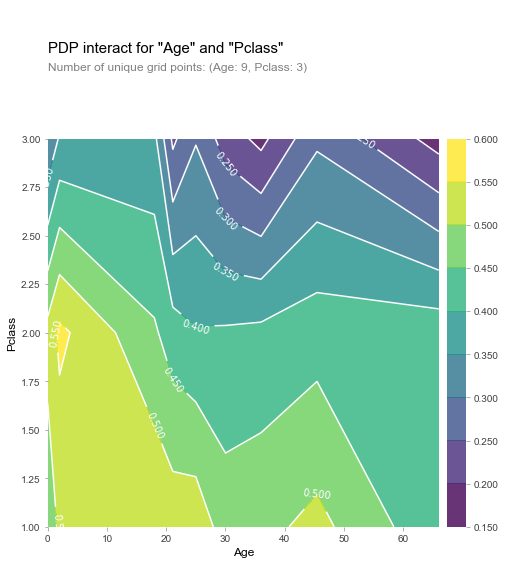

In [41]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Age', 'Pclass']
inter1  =  pdp.pdp_interact(model=clf, dataset=test, model_features=test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

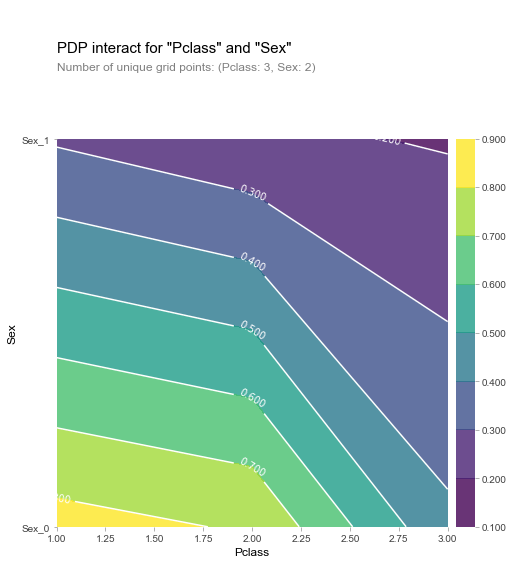

In [42]:
# Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
features_to_plot = ['Pclass', 'Sex']
inter1  =  pdp.pdp_interact(model=clf, dataset=test, model_features=test.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()

## SHAP Values

In [48]:
import shap  # package used to calculate Shap values

data_for_prediction = test.iloc[0,:]  # use 1 row of data here. Could use multiple rows if desired

# Create object that can calculate shap values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)